# 002 First Analysis

There are a number of things we want to look for in this data. Above all _how will we get the best return?_

  * What is the total prizemoney paid out by draw?
  * What are the differences in return by draw?
  * What are the differences in return by number?
  * _Are there differents in return by number combination?_

## Dividend share table

First we need another table: one that shows the stated share of prizemoney and odds of winning in each division.

The overall odds of winning are 1 in 42.

| Division	| Match	| Odds of Winning |Prize Pool % |
|-----------|-------|-----------------|-------------|
| 1         | 6 numbers | 1 in 8,145,060 | 32.75% |
| 2	        | 5 numbers and 1 or 2 supplementary numbers | 1 in 678,755 | 3.7% |
| 3	        | 5 numbers |1 in 36,689 | 5.6% |
| 4	        | 4 numbers | 1 in 733 | 8.3% |
| 5 | 3 numbers and 1 or 2 supplementary numbers | 1 in 297 | 12.25% |
| 6 | 3 numbers | 1 in 53 | 37.4% |

In [1]:
import pandas as pd

In [2]:
divisions_df = pd.DataFrame(dict(Division = [1, 2, 3, 4, 5, 6], 
     Match=['6 numbers', '5 numbers and 1 or 2 supplementary numbers', '5 numbers', '4 numbers', 
           '3 numbers and 1 or 2 supplementary numbers', '3 numbers'],
     Odds = [8145060, 678755, 36689, 733, 297, 53],
     PrizeSplit=[.3275, .037, .056, .083, .1225, .374]))

In [3]:
divisions_filename = 'divisions.pkl'
divisions_df.to_pickle(divisions_filename)

## Read in the data from pickle files

In [4]:
draws_filename = 'draws.pkl'
numbers_filename = 'numbers.pkl'
dividends_filename = 'dividends.pkl'
divisions_filename = 'divisions.pkl'

In [5]:
draws_df = pd.read_pickle(draws_filename)
numbers_df = pd.read_pickle(numbers_filename)
dividends_df = pd.read_pickle(dividends_filename)
divisions_df = pd.read_pickle(divisions_filename)

In [6]:
draws_df.head()

DrawNumber   DrawDate
0        3499 2015-01-31
1        3497 2015-01-24
2        3495 2015-01-17
3        3493 2015-01-10
4        3491 2015-01-03

In [7]:
numbers_df.head()

DrawNumber  NumberDrawn NumberType  Order
0        3499           36    Primary      1
1        3499           19    Primary      2
2        3499           26    Primary      3
3        3499            9    Primary      4
4        3499           15    Primary      5

In [8]:
dividends_df.head()

Division  BlocNumberOfWinners  BlocDividend    CompanyId  \
0         1                    5     845849.21  Tattersalls   
1         2                   57      10061.50  Tattersalls   
2         3                 1184       1045.25  Tattersalls   
3         4                58270         32.10  Tattersalls   
4         5               142924         21.95  Tattersalls   

   CompanyNumberOfWinners  CompanyDividend PoolTransferType  \
0                       1        845849.21             NONE   
1                      18         10061.50             NONE   
2                     457          1045.25             NONE   
3                   22243            32.10             NONE   
4                   54208            21.95             NONE   

   PoolTransferredTo  DrawNumber  
0                  0        3499  
1                  0        3499  
2                  0        3499  
3                  0        3499  
4                  0        3499

In [9]:
divisions_df.head()

Division                                       Match     Odds  PrizeSplit
0         1                                   6 numbers  8145060      0.3275
1         2  5 numbers and 1 or 2 supplementary numbers   678755      0.0370
2         3                                   5 numbers    36689      0.0560
3         4                                   4 numbers      733      0.0830
4         5  3 numbers and 1 or 2 supplementary numbers      297      0.1225

## 1. Total prizemoney by draw

Merge the `draws_df` and `dividends_df` data frames to get the dates. 

In [10]:
dividends_merge = draws_df.merge(dividends_df)

In [11]:
dividends_merge['TotalPrizemoney'] = dividends_merge['BlocNumberOfWinners']*dividends_merge['BlocDividend']
dividends_merge = dividends_merge.sort_values('DrawNumber')

In [62]:
draw_prizemoney = dividends_merge[dividends_merge['Division'] < 3].groupby(['DrawDate'])['TotalPrizemoney'].sum()

In [63]:
import matplotlib
%matplotlib inline

<AxesSubplot:xlabel='DrawDate'>

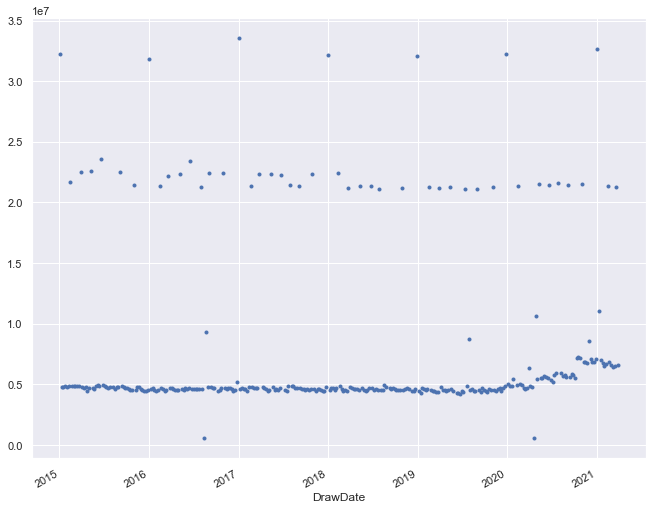

In [64]:
draw_prizemoney.plot(marker='.', linestyle='None', figsize=(11, 9))

In [67]:
draw_winners = dividends_merge[dividends_merge['Division'] < 3].groupby(['DrawDate'])['BlocNumberOfWinners'].sum()
draw_winners.head()

DrawDate
2015-01-03    241
2015-01-10     54
2015-01-17     56
2015-01-24     41
2015-01-31     62
Name: BlocNumberOfWinners, dtype: int64

<AxesSubplot:xlabel='DrawDate'>

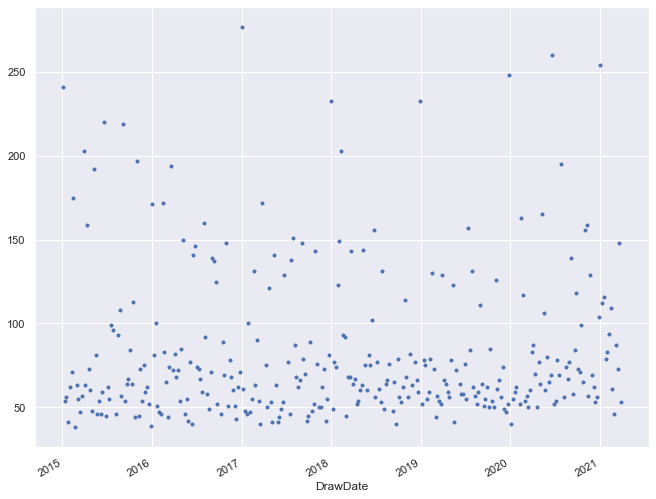

In [68]:
draw_winners.plot(marker='.', linestyle='None', figsize=(11, 9))

In [70]:
draw_winners_prize = dividends_merge[dividends_merge['Division'] < 3].groupby(['DrawDate'])[['TotalPrizemoney', 'BlocNumberOfWinners']].sum()



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='BlocNumberOfWinners', ylabel='TotalPrizemoney'>

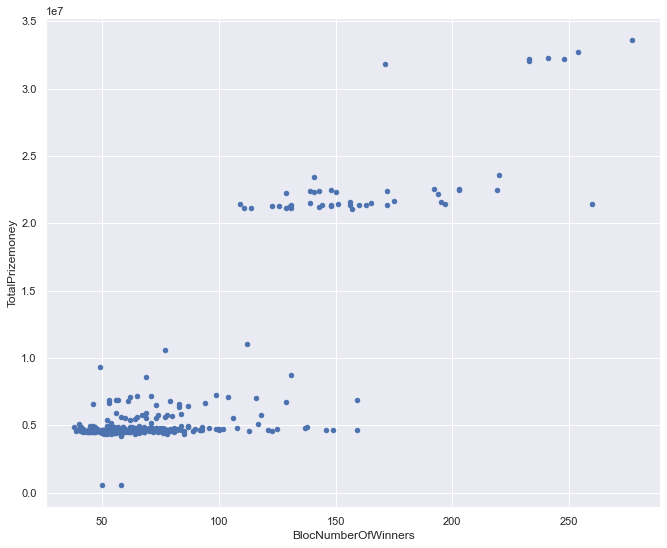

In [71]:
draw_winners_prize.plot.scatter(x='BlocNumberOfWinners', y='TotalPrizemoney', figsize=(11, 9))

I want to avoid the low-down cluster here, so want `TotalPrizemoney` $> 1.2 \times 10^7$ and `BlocNumberOfWinners` $< 150 $.

In [73]:
draw_winners_prize['target'] = (draw_winners_prize['TotalPrizemoney'] > 1.2e7) & (draw_winners_prize['BlocNumberOfWinners'] < 150)
draw_winners_prize['target'].value_counts()

False    297
True      20
Name: target, dtype: int64

/Users/jamespearce/opt/anaconda3/envs/lotto/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


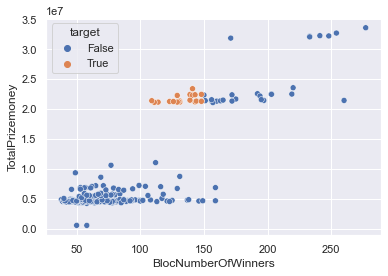

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot('BlocNumberOfWinners', 'TotalPrizemoney', data=draw_winners_prize, hue='target')

plt.show()

In [75]:
draw_winners_prize['DollarsPerWinner'] = draw_winners_prize['TotalPrizemoney']/draw_winners_prize['BlocNumberOfWinners']

/Users/jamespearce/opt/anaconda3/envs/lotto/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='DrawDate', ylabel='DollarsPerWinner'>

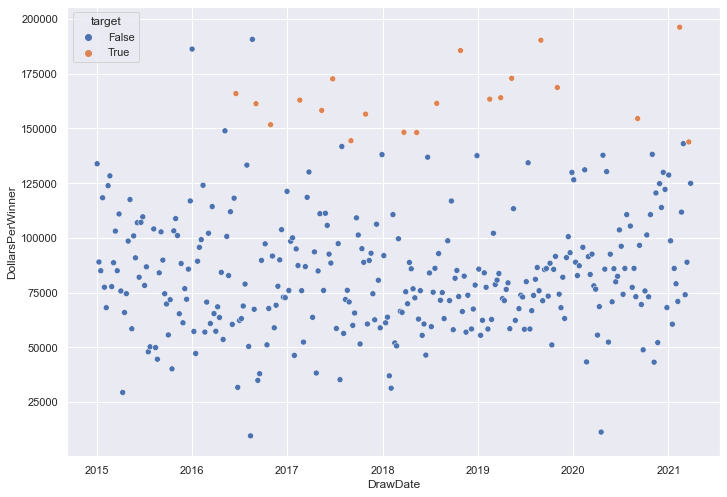

In [76]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot('DrawDate', 'DollarsPerWinner', hue='target', data=draw_winners_prize)

<AxesSubplot:xlabel='DrawDate', ylabel='DollarsPerWinner'>

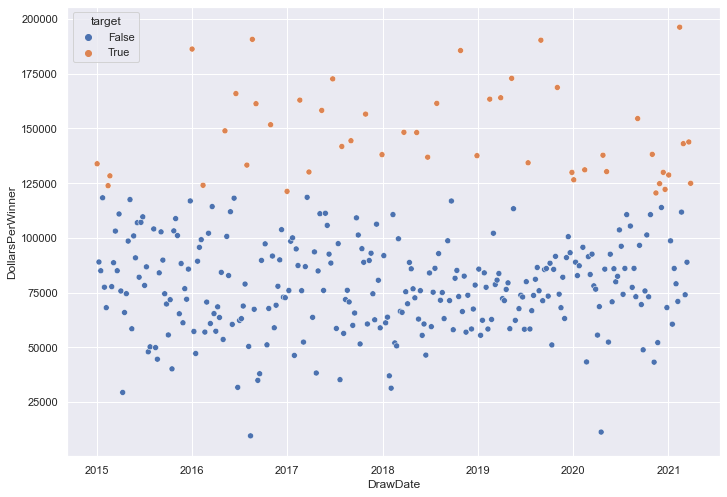

In [77]:
draw_winners_prize['target'] = (draw_winners_prize['DollarsPerWinner'] > 120000)
sns.scatterplot(x='DrawDate', y='DollarsPerWinner', hue='target', data=draw_winners_prize)

From **Saturday 10 October 2020 (draw 4093)** onwards, Saturday Lotto will be giving you the chance to win a share of the new estimated **\\$5 million division one prize pool!**

You read that right — an estimated \\$5 million division one prize pool will be up for grabs every Saturday! Imagine sharing a slice of that prize with your loved ones. This division one prize pool is an increase from the current estimated \\$4 million offering. 

But the exciting changes don’t stop there, with the chance of winning any prize improving from 1-in-85 to 1-in-42, based on a standard 1-game entry. This has been accomplished by changing the winning combination for division six. 

There’s also a change in the combination of winning numbers needed to win division six. Currently, 1 or 2 winning numbers + 2 supplementary numbers are needed. However, from Saturday 10 October 2020, only 3 winning numbers in a single game panel are required to win division six. Once these changes come into effect, the chance of winning division six will improve from 1-in-144 to 1-in-53.

For anyone who already loves playing Saturday Lotto, these game updates won’t change the way you play the game or how you win division one, so there’s no need to change your favourite numbers, update your subscriptions or change your ticket type. 

The only thing you do need to do is mark your calendars for Saturday 10 October 2020, as this could be the day you walk away with a share of an estimated \\$5 million division one prize! 

To support these exciting game updates, the price of playing Saturday Lotto will be increasing by 10 cents per game, per entry (plus commission) into Draw 4093 and beyond. You can find out the cost of your entry into the updated game by asking a friendly staff member from your local outlet. Alternatively, if purchasing your entry online at thelott.com or via the Lott app, the pricing of your entry will be displayed upon check-out. 

To recap, here’s the exciting updates the price increase will support:

- **New estimated \\$5 million division one prize pool**
- **Increased chance of winning any prize**
- **Increased chance of winning division six with only three winning numbers in a single game panel required.** 

We are so excited for these updates that will create more winners, more often! 

Last year there were 289 division one winning Saturday Lotto entries across Australia, which collectively won more than \\$333.41 million. Of these, 117 winning entries were held by Aussies who became overnight millionaires! We look forward to crowning more winners every year.

### 2. By division

As we can see above, the division rules changes in October 2020.

To see the different divisions, we will split them out.

Melt the data frame.

In [78]:
dividends_merge.head()

DrawNumber   DrawDate  Division  BlocNumberOfWinners  BlocDividend  \
24        3491 2015-01-03         1                   11    2727272.73   
29        3491 2015-01-03         6              1281101         12.45   
28        3491 2015-01-03         5               556504         22.20   
27        3491 2015-01-03         4               218426         33.70   
26        3491 2015-01-03         3                 4196       1160.95   

      CompanyId  CompanyNumberOfWinners  CompanyDividend PoolTransferType  \
24  Tattersalls                       3       2727272.73             NONE   
29  Tattersalls                  401849            12.45             NONE   
28  Tattersalls                  171047            22.20             NONE   
27  Tattersalls                   68222            33.70             NONE   
26  Tattersalls                    1382          1160.95             NONE   

    PoolTransferredTo  TotalPrizemoney  
24                  0      30000000.03  
29                  0      15949707.45  
28                  0      12354388.80  
27                  0       7360956.20  
26                  0       4871346.20

In [79]:
draw_winners_prize.reset_index().head()

DrawDate  TotalPrizemoney  BlocNumberOfWinners  target  DollarsPerWinner
0 2015-01-03      32257415.53                  241    True     133848.197220
1 2015-01-10       4804531.48                   54   False      88972.805185
2 2015-01-17       4758349.64                   56   False      84970.529286
3 2015-01-24       4850386.35                   41   False     118302.106098
4 2015-01-31       4802751.55                   62   False      77463.734677

In [80]:
draw_winners_prize.head()

TotalPrizemoney  BlocNumberOfWinners  target  DollarsPerWinner
DrawDate                                                                  
2015-01-03      32257415.53                  241    True     133848.197220
2015-01-10       4804531.48                   54   False      88972.805185
2015-01-17       4758349.64                   56   False      84970.529286
2015-01-24       4850386.35                   41   False     118302.106098
2015-01-31       4802751.55                   62   False      77463.734677

In [81]:
draw_winners_prize[draw_winners_prize['target']]

TotalPrizemoney  BlocNumberOfWinners  target  DollarsPerWinner
DrawDate                                                                  
2015-01-03      32257415.53                  241    True     133848.197220
2015-02-14      21669603.17                  175    True     123826.303829
2015-02-21       4876543.74                   38    True     128330.098421
2016-01-02      31848958.80                  171    True     186251.221053
2016-02-13      21329745.03                  172    True     124010.145523
2016-05-07      22332576.00                  150    True     148883.840000
2016-06-18      23394352.17                  141    True     165917.391277
2016-07-30      21318514.10                  160    True     133240.713125
2016-08-20       9343774.52                   49    True     190689.275918
2016-09-03      22419968.01                  139    True     161294.733885
2016-10-29      22450384.76                  148    True     151691.788919
2016-12-31      33580741.67                  277    True     121230.114332
2017-02-18      21343651.30                  131    True     162928.635878
2017-03-25      22374810.80                  172    True     130086.109302
2017-05-13      22309451.50                  141    True     158223.060284
2017-06-24      22268706.00                  129    True     172625.627907
2017-07-29      21404136.82                  151    True     141749.250464
2017-09-02      21367990.04                  148    True     144378.311081
2017-10-28      22385105.60                  143    True     156539.200000
2017-12-30      32161128.03                  233    True     138030.592403
2018-03-24      21194579.30                  143    True     148213.841259
2018-05-12      21328548.02                  144    True     148114.916806
2018-06-23      21349572.90                  156    True     136856.236538
2018-07-28      21147992.02                  131    True     161435.053588
2018-10-27      21156011.97                  114    True     185579.052368
2018-12-29      32049904.93                  233    True     137553.240043
2019-02-16      21237654.84                  130    True     163366.575692
2019-03-30      21156806.07                  129    True     164006.248605
2019-05-11      21263330.94                  123    True     172872.609268
2019-07-13      21084683.62                  157    True     134297.347898
2019-08-31      21123709.62                  111    True     190303.690270
2019-11-02      21255863.94                  126    True     168697.332857
2019-12-28      32212039.53                  248    True     129887.256169
2020-01-04       5061200.66                   40    True     126530.016500
2020-02-15      21366201.00                  163    True     131080.987730
2020-04-25      10606772.40                   77    True     137750.290909
2020-05-09      21492960.72                  165    True     130260.368000
2020-09-05      21476331.60                  139    True     154505.982734
2020-10-31      21551855.90                  156    True     138152.922436
2020-11-14       6868722.24                   57    True     120503.898947
2020-11-28       8608581.93                   69    True     124762.056957
2020-12-12       6885395.33                   53    True     129913.119434
2020-12-19       6839694.40                   56    True     122137.400000
2021-01-02      32693417.28                  254    True     128714.241260
2021-02-13      21391012.40                  109    True     196247.820183
2021-02-27       6579455.20                   46    True     143031.634783
2021-03-20      21283422.00                  148    True     143806.905405
2021-03-27       6620838.81                   53    True     124921.486981

In [82]:
dividends_target = dividends_merge.merge(draw_winners_prize.reset_index()[['DrawDate', 'target']], on='DrawDate')
dividends_target.head(10)


DrawNumber   DrawDate  Division  BlocNumberOfWinners  BlocDividend  \
0        3491 2015-01-03         1                   11    2727272.73   
1        3491 2015-01-03         6              1281101         12.45   
2        3491 2015-01-03         5               556504         22.20   
3        3491 2015-01-03         4               218426         33.70   
4        3491 2015-01-03         3                 4196       1160.95   
5        3491 2015-01-03         2                  230       9814.85   
6        3493 2015-01-10         4                57599         32.55   
7        3493 2015-01-10         3                 1069       1159.60   
8        3493 2015-01-10         2                   50      11489.10   
9        3493 2015-01-10         1                    4    1057519.12   

     CompanyId  CompanyNumberOfWinners  CompanyDividend PoolTransferType  \
0  Tattersalls                       3       2727272.73             NONE   
1  Tattersalls                  401849            12.45             NONE   
2  Tattersalls                  171047            22.20             NONE   
3  Tattersalls                   68222            33.70             NONE   
4  Tattersalls                    1382          1160.95             NONE   
5  Tattersalls                      61          9814.85             NONE   
6  Tattersalls                   22137            32.55             NONE   
7  Tattersalls                     431          1159.60             NONE   
8  Tattersalls                      19         11489.10             NONE   
9  Tattersalls                       2       1057519.12             NONE   

   PoolTransferredTo  TotalPrizemoney  target  
0                  0      30000000.03    True  
1                  0      15949707.45    True  
2                  0      12354388.80    True  
3                  0       7360956.20    True  
4                  0       4871346.20    True  
5                  0       2257415.50    True  
6                  0       1874847.45   False  
7                  0       1239612.40   False  
8                  0        574455.00   False  
9                  0       4230076.48   False

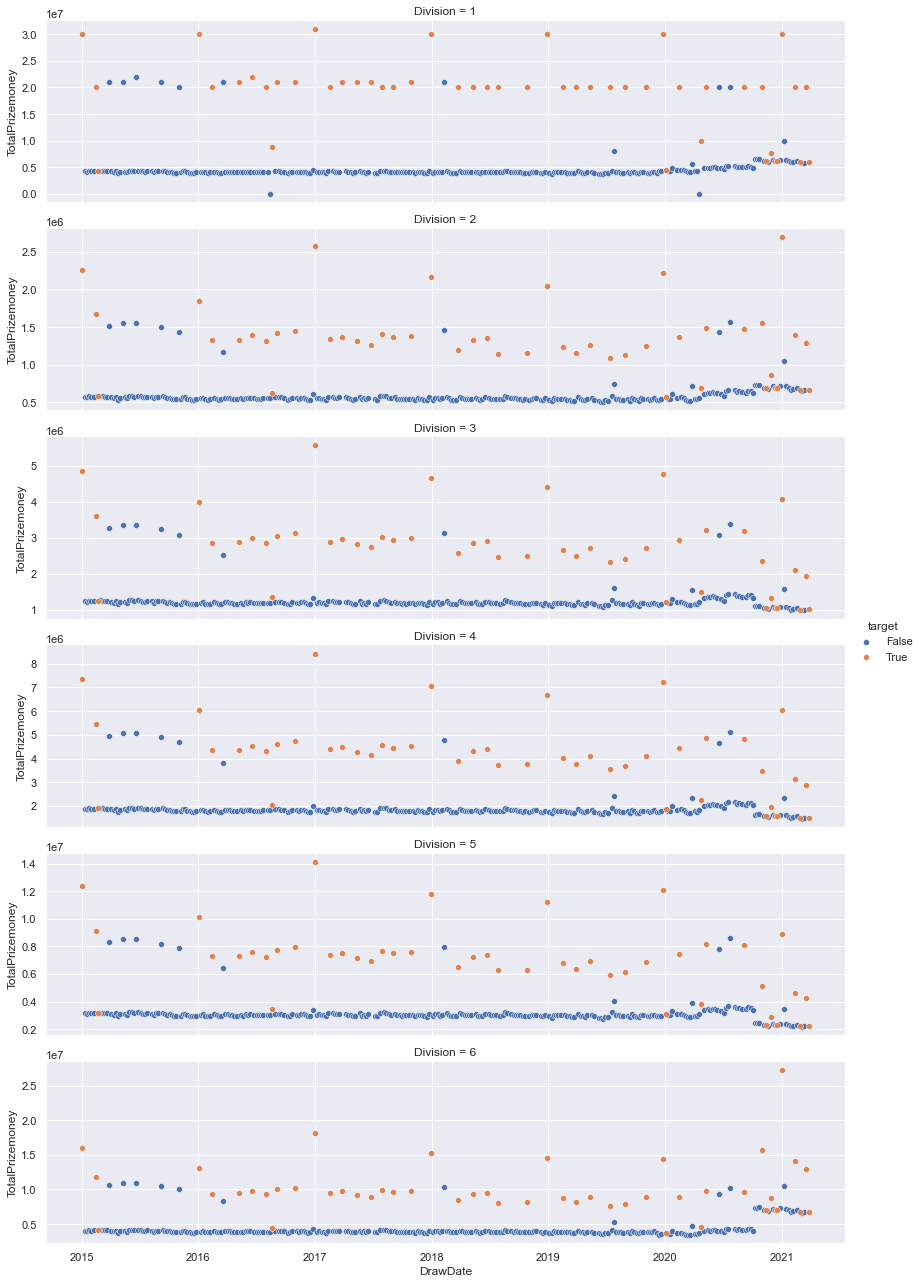

In [83]:
g = sns.FacetGrid(dividends_target, row='Division', hue='target', aspect=4, sharey=False)
g.map(sns.scatterplot, "DrawDate", "TotalPrizemoney")
g.add_legend()

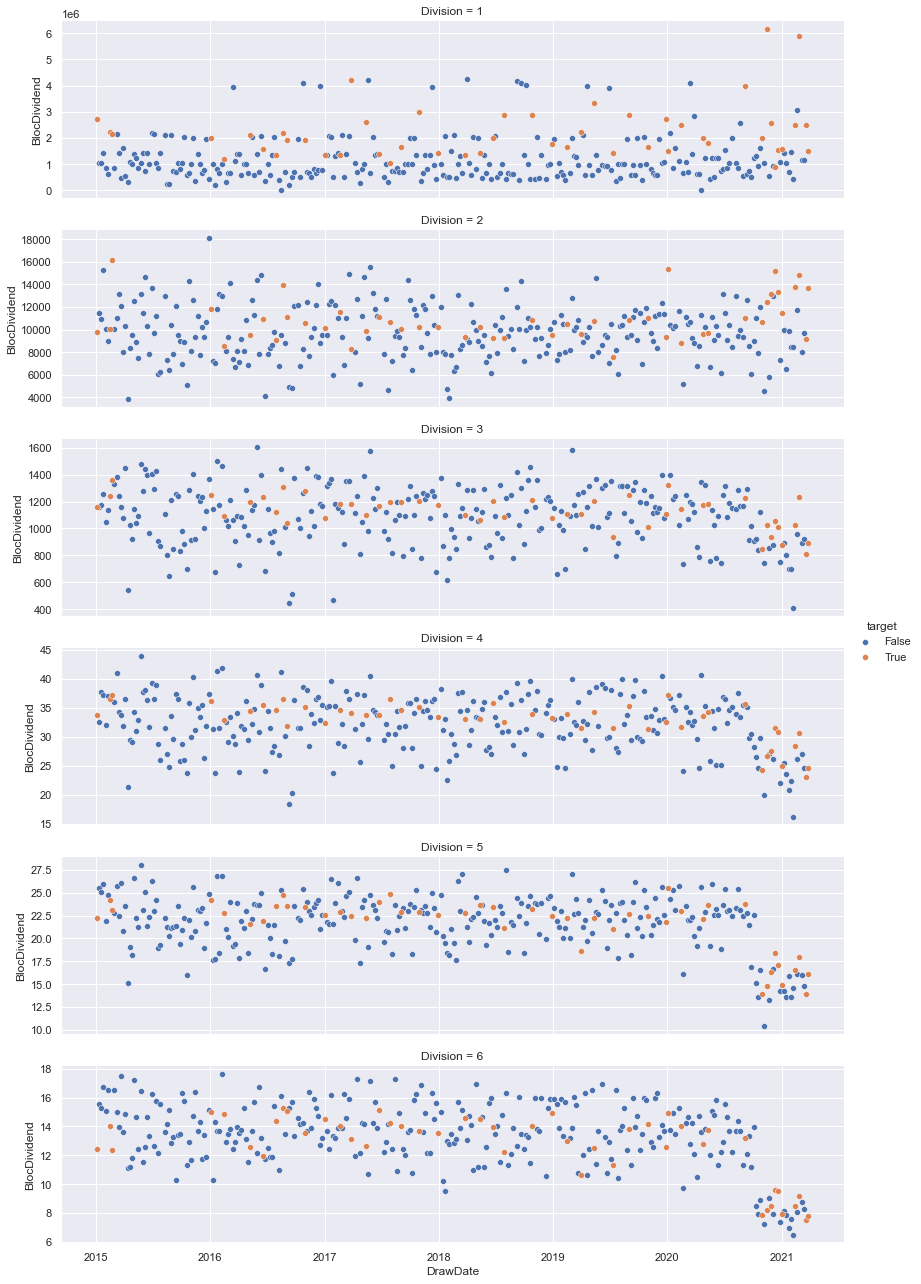

In [84]:
g = sns.FacetGrid(dividends_target, row='Division', hue='target', aspect=4, sharey=False)
g.map(sns.scatterplot, "DrawDate", "BlocDividend")
g.add_legend()

Look at Division 1 + Division 2 / Division 3. What stands out?

<AxesSubplot:xlabel='DrawDate'>

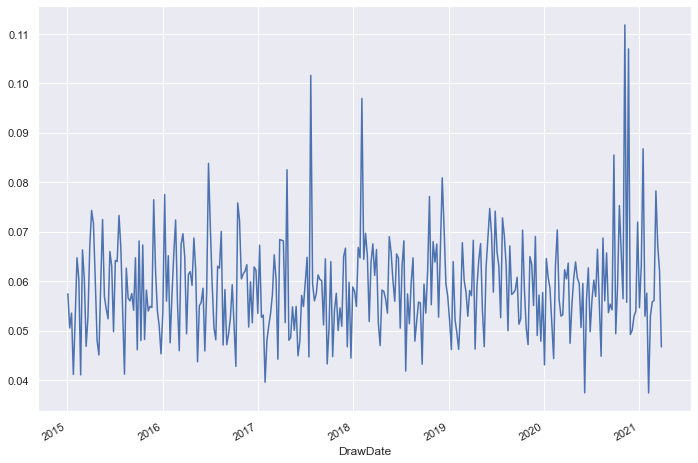

In [85]:
(dividends_target[dividends_target['Division'] <3].groupby('DrawDate')['BlocNumberOfWinners'].sum()/\
    dividends_target.loc[dividends_target['Division'] == 3].groupby('DrawDate')['BlocNumberOfWinners'].sum()).plot()

In [102]:
draw_winners_all = dividends_merge.groupby(['DrawNumber'])[['BlocNumberOfWinners', 'TotalPrizemoney']].sum().reset_index()
draw_winners_all


DrawNumber  BlocNumberOfWinners  TotalPrizemoney
0          3491              2060468      72793814.18
1          3493               442779      15117265.93
2          3495               437390      14981904.29
3          3497               418979      15271948.90
4          3499               471161      15092227.40
..          ...                  ...              ...
312        4133               910752      18049613.60
313        4135               945666      17666276.50
314        4137              1015219      17840793.05
315        4139              2162715      43338020.10
316        4141              1073309      18124770.46

[317 rows x 3 columns]

In [104]:
numbers_winners = numbers_df.merge(draw_winners_all)
numbers_winners.head()

DrawNumber  NumberDrawn NumberType  Order  BlocNumberOfWinners  \
0        3499           36    Primary      1               471161   
1        3499           19    Primary      2               471161   
2        3499           26    Primary      3               471161   
3        3499            9    Primary      4               471161   
4        3499           15    Primary      5               471161   

   TotalPrizemoney  
0       15092227.4  
1       15092227.4  
2       15092227.4  
3       15092227.4  
4       15092227.4

<AxesSubplot:xlabel='NumberDrawn'>

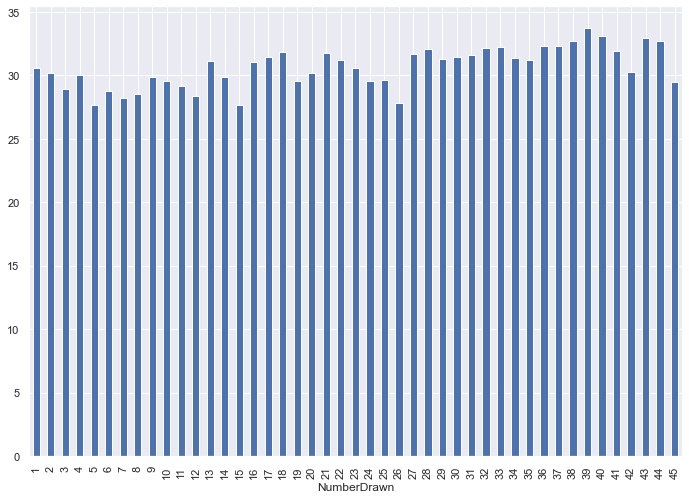

In [107]:
numbers_sum = numbers_winners.groupby('NumberDrawn')[['BlocNumberOfWinners', 'TotalPrizemoney']].sum()
numbers_sum['MeanDividend'] = numbers_sum['TotalPrizemoney']/numbers_sum['BlocNumberOfWinners']
numbers_sum['MeanDividend'].plot.bar()

In [111]:
numbers_df['NumberDrawn'].max()

45

In [154]:
numbers_sum['Ratio'] = numbers_sum['MeanDividend']*numbers_sum['BlocNumberOfWinners'].sum()/numbers_sum['TotalPrizemoney'].sum()
numbers_sum['AdjustedProbability'] = numbers_sum['Ratio']/45
numbers_sum['AdjustedProbability'] = numbers_sum['AdjustedProbability']/numbers_sum['AdjustedProbability'].sum()
numbers_sum.sort_values('MeanDividend', ascending=False)

BlocNumberOfWinners  TotalPrizemoney  MeanDividend     Ratio  \
NumberDrawn                                                                 
39                      38971956     1.315266e+09     33.749048  1.101548   
40                      33350318     1.103456e+09     33.086812  1.079933   
43                      26006602     8.570404e+08     32.954726  1.075621   
44                      34675405     1.134285e+09     32.711509  1.067683   
38                      42869149     1.401168e+09     32.684768  1.066810   
36                      33126438     1.071163e+09     32.335603  1.055414   
37                      38089006     1.230490e+09     32.305659  1.054436   
33                      34329717     1.107138e+09     32.250130  1.052624   
32                      36954422     1.189730e+09     32.194529  1.050809   
28                      30061230     9.650939e+08     32.104270  1.047863   
41                      29750962     9.490570e+08     31.900044  1.041197   
18                      38832493     1.236317e+09     31.837190  1.039146   
21                      34786855     1.105091e+09     31.767501  1.036871   
27                      46589322     1.475821e+09     31.677228  1.033925   
31                      43107729     1.361950e+09     31.594103  1.031212   
17                      41956217     1.318835e+09     31.433600  1.025973   
30                      37654893     1.183361e+09     31.426476  1.025740   
34                      37539010     1.178512e+09     31.394341  1.024691   
29                      36825246     1.151341e+09     31.264985  1.020469   
35                      37180484     1.159853e+09     31.195219  1.018192   
22                      49587707     1.546591e+09     31.189006  1.017989   
13                      41459658     1.291398e+09     31.148304  1.016661   
16                      46508438     1.445587e+09     31.082250  1.014505   
1                       42932333     1.313961e+09     30.605386  0.998940   
23                      32739753     1.001983e+09     30.604466  0.998910   
42                      37105756     1.124714e+09     30.311039  0.989333   
2                       34888899     1.052870e+09     30.177794  0.984984   
20                      31782571     9.588514e+08     30.169094  0.984700   
4                       38646326     1.159470e+09     30.002069  0.979249   
14                      36040994     1.076657e+09     29.873111  0.975039   
9                       33793766     1.009239e+09     29.864649  0.974763   
25                      33432401     9.912102e+08     29.648189  0.967698   
19                      32379017     9.577920e+08     29.580638  0.965493   
24                      36190137     1.069235e+09     29.544936  0.964328   
10                      40187164     1.186954e+09     29.535642  0.964025   
45                      30883080     9.102541e+08     29.474201  0.962019   
11                      43422095     1.265848e+09     29.152172  0.951508   
3                       38784657     1.121901e+09     28.926406  0.944140   
6                       34931710     1.006130e+09     28.802773  0.940104   
8                       33661514     9.596500e+08     28.508819  0.930510   
12                      33653894     9.549507e+08     28.375637  0.926163   
7                       42437495     1.196631e+09     28.197498  0.920349   
26                      43100533     1.198649e+09     27.810530  0.907718   
5                       41152934     1.138554e+09     27.666408  0.903014   
15                      38578370     1.066294e+09     27.639696  0.902142   

             AdjustedProbability  
NumberDrawn                       
39                      0.024460  
40                      0.023980  
43                      0.023884  
44                      0.023708  
38                      0.023689  
36                      0.023436  
37                      0.023414  
33                      0.023374  
32                      0.023333  
28      

Write this out to a file.

In [155]:
return_filename = 'return-by-number.pkl'
numbers_sum.to_pickle(return_filename)

## Number picker

Using the over- and under-indexed file values, write a routine to generate $n \times 6$ random selections.

In [156]:
return_filename = 'return-by-number.pkl'
numbers_sum_df = pd.read_pickle(return_filename)

In [157]:
numbers_dict = numbers_sum_df['AdjustedProbability'].to_dict()

In [158]:
numbers_dict[45]

0.02136185568491613

Define the function.

In [186]:
from numpy import random

def lotto_picker(picks=1, balls=45, probs=None, number_drawn=6, random_state=None):
    rng = random.RandomState(random_state)

    if probs == None:
        probs = [1/balls for _ in range(balls)]
    else: # probs is a dict
        probs = [ probs[i] for i in probs]
    sum_prob = sum(probs)
    probs = [prob/sum_prob for prob in probs]
    all_balls = [ball+1 for ball in range(balls)]
    selection_list = []
    for i in range(picks):
        pick = rng.choice(all_balls, size=number_drawn, p=probs, replace=False).tolist()
        selection_list.append(pick)
    
    
    return selection_list
    

In [189]:
def test_lotto_picker():
    picks = lotto_picker(probs=numbers_dict, random_state=1234)
    print(picks)
    assert len(picks[0]) == 6
    
    picks = lotto_picker(probs=numbers_dict, picks=18, random_state=1234)
    print(picks)
    assert len(picks) == 18
    
test_lotto_picker()

[[10, 29, 21, 36, 13, 14]]
[[10, 29, 21, 36, 13, 14], [37, 44, 40, 17, 24, 32], [33, 18, 27, 24, 1, 36], [40, 18, 29, 4, 43, 30], [19, 36, 15, 27, 40, 21], [37, 7, 33, 11, 42, 21], [42, 3, 9, 31, 28, 24], [2, 27, 16, 24, 6, 29], [27, 1, 29, 42, 37, 45], [44, 37, 14, 29, 23, 10], [18, 3, 21, 45, 6, 35], [28, 22, 6, 11, 41, 20], [25, 1, 15, 21, 29, 42], [29, 33, 8, 35, 38, 30], [21, 8, 27, 25, 43, 23], [24, 25, 38, 3, 31, 36], [33, 37, 26, 44, 7, 2], [28, 6, 43, 16, 10, 22]]
